# UAS Project Streamlit:
- **Nama:** I Gede Maha Putra
- **Dataset:** Dataset berupa gambar mata yang telah dibagi menjadi data train dan data test serta sudah dibagi menjadi mata katarak dan tidak
- **URL Website:**



## Menentukan Pertanyaan Bisnis

Tujuan Utama Aplikasi:

Apa tujuan utama dari aplikasi deteksi katarak ini? Apakah itu untuk pencegahan, diagnosis dini, atau pemantauan kondisi mata?

Target Pengguna:

Siapa target pengguna utama aplikasi ini? Apakah itu untuk pengguna umum atau lebih ditujukan untuk pelayan kesehatan, dokter, atau spesialis mata?

Keunggulan Aplikasi:

Apa yang akan membuat aplikasi ini unggul dibandingkan solusi deteksi katarak yang sudah ada? Bagaimana aplikasi ini dapat memberikan nilai tambah kepada pengguna?

Kemudahan Penggunaan:

Seberapa mudah aplikasi ini digunakan oleh pengguna akhir? Bagaimana antarmuka pengguna (UI) dan pengalaman pengguna (UX) akan dirancang untuk memastikan keterlibatan dan kenyamanan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import os
from PIL import Image
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers.experimental import RMSprop
import tensorflow as tf
from keras.preprocessing import image

## Data Wrangling

### Gathering Data

In [3]:
image_paths = {
    "train_cataract" : [],
    "train_normal" : [],
    "test_cataract" : [],
    "test_normal" : []
}
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if "train/cataract" in path:
            image_paths["train_cataract"].append(path)
        elif "train/normal" in path:
            image_paths["train_normal"].append(path)
        elif "test/cataract" in path:
            image_paths["test_cataract"].append(path)
        elif "test/normal" in path:
            image_paths["test_normal"].append(path)






### Assessing Data

In [4]:
len(image_paths["train_normal"])

246

## Exploratory Data Analysis (EDA)

### Explore ...

In [5]:
training_dir = "/input/cataract-image-dataset/processed_images/train/"
image_size = (55, 94, 3)
target_size = (55, 94)

In [6]:
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = target_size,
    class_mode = 'binary'
)

Found 491 images belonging to 2 classes.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

size of image : (68, 131, 3)


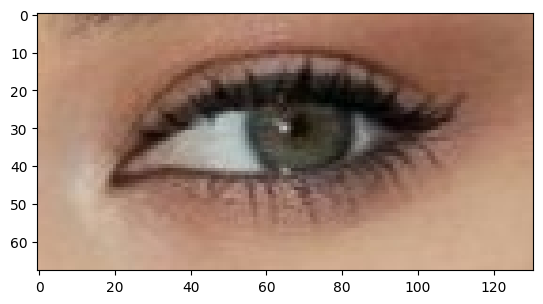

In [7]:
sample_img = np.array(Image.open(image_paths["test_normal"][1]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

### Pertanyaan 2:

size of image : (727, 1091, 3)


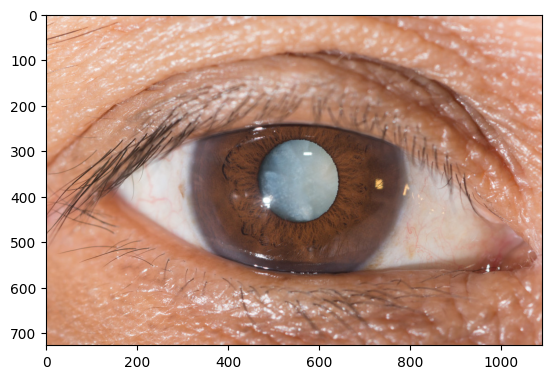

In [8]:
sample_img = np.array(Image.open(image_paths["test_cataract"][0]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

## Membuat Model

In [9]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu',input_shape=image_size),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 53, 92, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 46, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 44, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 22, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8448)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [11]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer=RMSprop(lr=0.001),
    metrics=['accuracy']
)

### Training Model

In [12]:
history = model.fit_generator(
    train_generator,
    epochs=15
)

<ipython-input-12-d86d002ec681>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
16/16 [==============================] - 18s 1s/step - loss: 0.8237 - accuracy: 0.4908
Epoch 2/15
16/16 [==============================] - 17s 1s/step - loss: 0.5743 - accuracy: 0.7475
Epoch 3/15
16/16 [==============================] - 17s 1s/step - loss: 0.4346 - accuracy: 0.8411
Epoch 4/15
16/16 [==============================] - 18s 1s/step - loss: 0.4040 - accuracy: 0.8432
Epoch 5/15
16/16 [==============================] - 18s 1s/step - loss: 0.3341 - accuracy: 0.8656
Epoch 6/15
16/16 [==============================] - 24s 1s/step - loss: 0.3288 - accuracy: 0.8697
Epoch 7/15
16/16 [==============================] - 17s 1s/step - loss: 0.2798 - accuracy: 0.8880
Epoch 8/15
16/16 [==============================] - 17s 1s/step - loss: 0.2557 - accuracy: 0.9084
Epoch 9/15
16/16 [==============================] - 18s 1s/step - loss: 0.2333 - accuracy: 0.9022
Epoch 10/15
16/16 [==============================] - 17s 1s/step - loss: 0.2184 - accuracy: 0.9084
Epoch 11/15
16/16 [

### Evaluasi Model

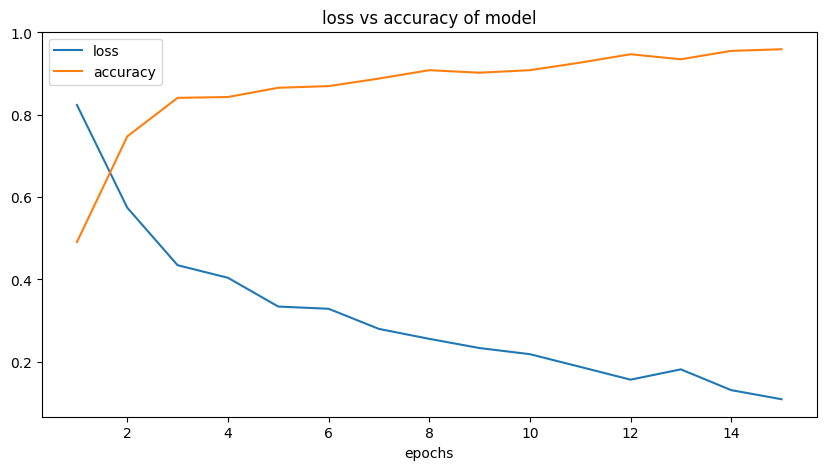

In [13]:
epochs = range(1, 16)
plt.figure(figsize=(10, 5))
plt.title("loss vs accuracy of model")
plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['accuracy'], label='accuracy')
plt.grid()
plt.xlabel("epochs")
plt.grid()
plt.legend()

In [14]:
def _predict(model, path):
    img = np.array(Image.open(path).resize((94, 55)))
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    if pred[0] > 0.5:
        return 'normal'
    else:
        return 'cataract'

In [15]:
def evaluate(model, normal_path, cataract_path):
    normal_pred = []
    cataract_pred = []
    for normal, cataract in zip(normal_path, cataract_path):
        res_cataract = _predict(model, cataract)
        cataract_pred.append(res_cataract)

        res_normal = _predict(model, normal)
        normal_pred.append(res_normal)

    return normal_pred, cataract_pred

In [16]:
both_size = min(len(image_paths["test_normal"]), len(image_paths["test_cataract"]))
cataract_test_path = image_paths["test_cataract"][:both_size]
normal_test_path = image_paths["test_normal"][:both_size]
normal_pred, cataract_pred = evaluate(model, image_paths["test_normal"], image_paths["test_cataract"])

1/1 [==============================] - 0s 23ms/step


In [17]:
pred_df = pd.DataFrame()
pred_df["relative_path"] = normal_test_path + cataract_test_path
pred_df["actual_class"] = ["normal"]*len(normal_test_path) + ["cataract"]*len(cataract_test_path)
pred_df["predicted_class"] = normal_pred + cataract_pred

In [18]:
pred_df.tail(20)

,relative_path,actual_class,predicted_class
100,/input/cataract-image-dataset/processed_images...,cataract,cataract
101,/input/cataract-image-dataset/processed_images...,cataract,cataract
102,/input/cataract-image-dataset/processed_images...,cataract,cataract
103,/input/cataract-image-dataset/processed_images...,cataract,cataract
104,/input/cataract-image-dataset/processed_images...,cataract,cataract
105,/input/cataract-image-dataset/processed_images...,cataract,cataract
106,/input/cataract-image-dataset/processed_images...,cataract,cataract
107,/input/cataract-image-dataset/processed_images...,cataract,cataract
108,/input/cataract-image-dataset/processed_images...,cataract,cataract
109,/input/cataract-image-dataset/processed_images...,cataract,cataract


In [19]:
tp = tn = fp = fn = 0
for actual, predicted in zip(list(pred_df['actual_class']), list(pred_df['predicted_class'])):
    if actual == 'normal' and predicted == 'normal':
        tp = tp + 1
    elif actual == 'cataract' and predicted == 'cataract':
        tn = tn + 1
    elif actual == 'normal' and predicted == 'cataract':
        fp = fp + 1
    elif actual == 'cataract' and predicted == 'normal':
        fn = fn + 1

In [20]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

In [21]:
evaluation_summary = pd.DataFrame()
evaluation_summary["accuracy"] = [accuracy]
evaluation_summary["precision"] = [precision]
evaluation_summary["recall"] = [recall]
evaluation_summary["f1"] = [f1]

In [22]:
evaluation_summary

,accuracy,precision,recall,f1
0,0.858333,0.75,0.957447,0.841121


### Menyimpan Model

In [23]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)


## Conclusion

- Aplikasi ini lebih digunakan untuk diagnosis dini dari katarak
- Aplikasi ini ditunjukkan untuk masyarakat umum
- Aplikasi ini dapat memberikan nilai tambah kepada pengguna yang membutuhkan akses cepat
- Aplikasi ini akan mudah digunakan dengan ui dan ux yang baik pada streamlit
